In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


In [10]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [11]:
data.shape

(16468, 14)

In [13]:
data.drop('Unnamed: 0',axis=1,inplace=True) #drop unnecessary feature


In [14]:
data.isna().sum() #there are variety of nulls

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [16]:
#as the date over here is string datatype we will convert it to datetime format

data['Date']=pd.to_datetime(data['Date'])     
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)


In [17]:
#we will fill the nulls using simpleimputer

imp = SimpleImputer(strategy='mean')
data['Date'] = imp.fit_transform(data['Date'].values.reshape(-1, 1) )

data['Date'].isna().sum()


0

In [26]:
data.isna().sum()

Date                0
AveragePrice        0
Total Volume        0
4046                0
4225                0
4770                0
Total Bags          0
Small Bags          0
Large Bags          0
XLarge Bags         0
type            14951
year                0
region          14951
Month               0
Day                 0
dtype: int64

In [20]:
#imputing the null values using imputer

imp = SimpleImputer(strategy='mean')
data['AveragePrice'] = imp.fit_transform(data['AveragePrice'].values.reshape(-1, 1) )
data['Total Bags'] = imp.fit_transform(data['Total Bags'].values.reshape(-1, 1) )
data['Small Bags'] = imp.fit_transform(data['Small Bags'].values.reshape(-1, 1) )
data['Large Bags'] = imp.fit_transform(data['Large Bags'].values.reshape(-1, 1) )
data['XLarge Bags'] = imp.fit_transform(data['XLarge Bags'].values.reshape(-1, 1) )
data['year'] = imp.fit_transform(data['year'].values.reshape(-1, 1) )
data['Month'] = imp.fit_transform(data['Month'].values.reshape(-1, 1) )
data['Day'] = imp.fit_transform(data['Day'].values.reshape(-1, 1) )




In [22]:
data['4046'] = imp.fit_transform(data['4046'].values.reshape(-1, 1) )


In [23]:
data['4225'] = imp.fit_transform(data['4225'].values.reshape(-1, 1) )
data['4770'] = imp.fit_transform(data['4770'].values.reshape(-1, 1) )


In [25]:
data['Total Volume'] = imp.fit_transform(data['Total Volume'].values.reshape(-1, 1) )


In [27]:
#filling nan for the column type and region when you have string datatype

data.type = data.type.fillna('none')
data.region = data.region.fillna('none')



In [29]:
data.isna().sum()  #filled all the null values 

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [30]:
#we will drop irrelevant features which are type region and date as we already have year month and day

data.drop('Date',axis=1,inplace=True)
data.drop('type',axis=1,inplace=True)
data.drop('region',axis=1,inplace=True)


In [31]:
data.shape

(16468, 12)

In [32]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11.0,29.0


In [33]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,16468.000000,16468.000000,16468.000000,16468.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
std,0.057313,1.345098e+06,5.909424e+05,5.075910e+05,4.180541e+04,2.299843e+05,1.964565e+05,3.586885e+04,2262.202563,0.112060,1.028967,2.669088
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
50%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
75%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [36]:
cor = data.corr()
cor


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.066859,0.092531
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.090520,-0.022423
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.090647,-0.018394
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.091329,-0.032709
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.074855,-0.014611
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.081330,-0.009035
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.084376,-0.003583
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.062447,-0.038890
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.049232,0.009174
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,0.004111,0.023543


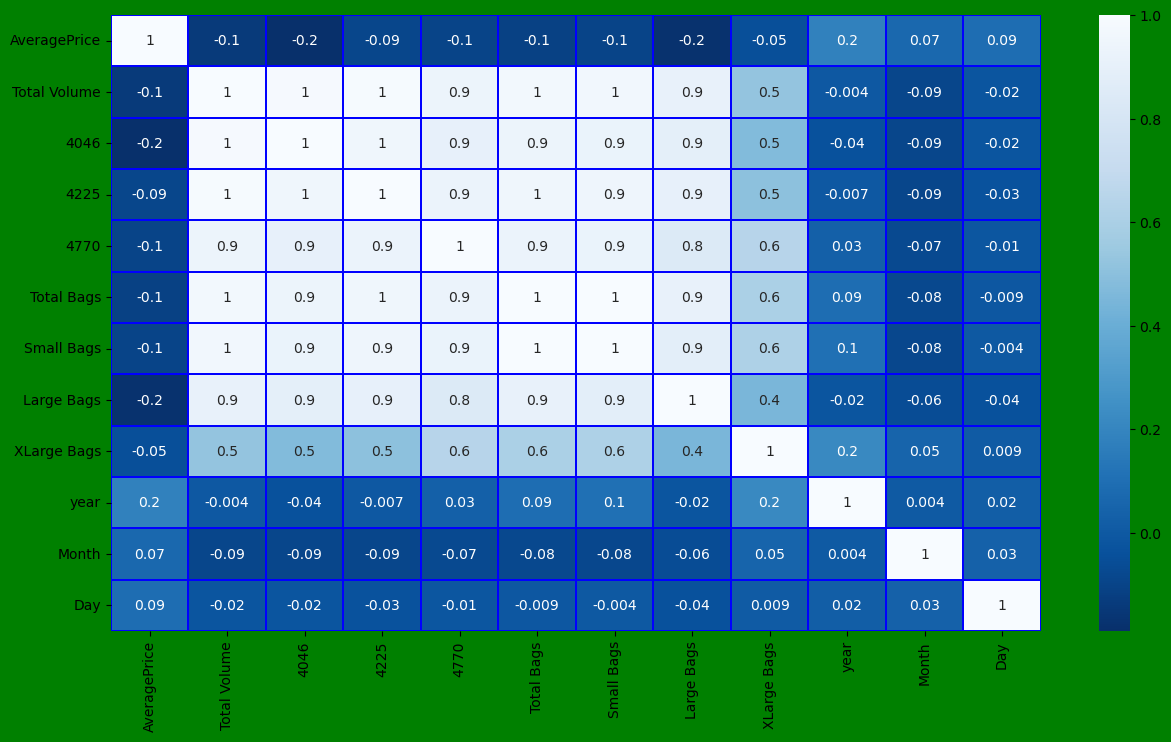

In [37]:
#we will use heatmap to check the multicollinearity
plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

we can see multicollinearity issue through this heat map so we need to drop certain columns to avoid such issue

In [38]:
data.drop('4046',axis=1,inplace=True)
data.drop('4225',axis=1,inplace=True)
data.drop('4770',axis=1,inplace=True)
data.drop('Small Bags',axis=1,inplace=True)
data.drop('Large Bags',axis=1,inplace=True)
data.drop('XLarge Bags',axis=1,inplace=True)


In [39]:
data.shape

(16468, 6)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  16468 non-null  float64
 1   Total Volume  16468 non-null  float64
 2   Total Bags    16468 non-null  float64
 3   year          16468 non-null  float64
 4   Month         16468 non-null  float64
 5   Day           16468 non-null  float64
dtypes: float64(6)
memory usage: 772.1 KB


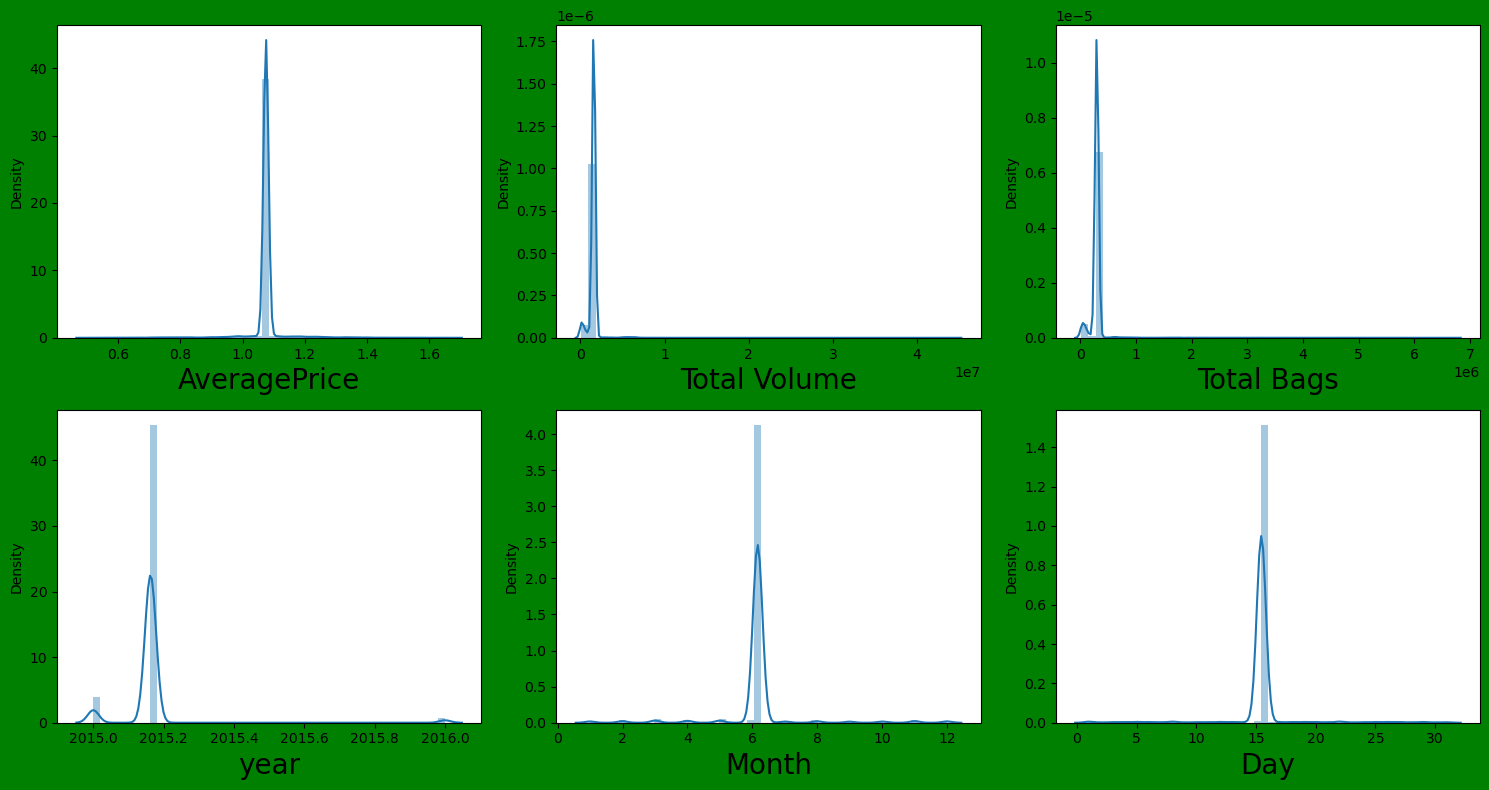

In [42]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=7:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [43]:
data.skew()

AveragePrice    -0.360270
Total Volume    20.409801
Total Bags      17.665207
year             6.018559
Month            0.768373
Day              0.091315
dtype: float64

In [44]:
#we will reduce the skewness through cube root method

data['Total Volume']=np.cbrt(data['Total Volume'])
data['Total Bags']=np.cbrt(data['Total Bags'])
data['year']=np.cbrt(data['year'])


In [45]:
data.skew() #as we can see we have successfully reduced the skewness

AveragePrice   -0.360270
Total Volume    0.769938
Total Bags      0.928057
year            6.018011
Month           0.768373
Day             0.091315
dtype: float64

In [47]:
y = data['AveragePrice']
x = data.drop(columns = ['AveragePrice'])

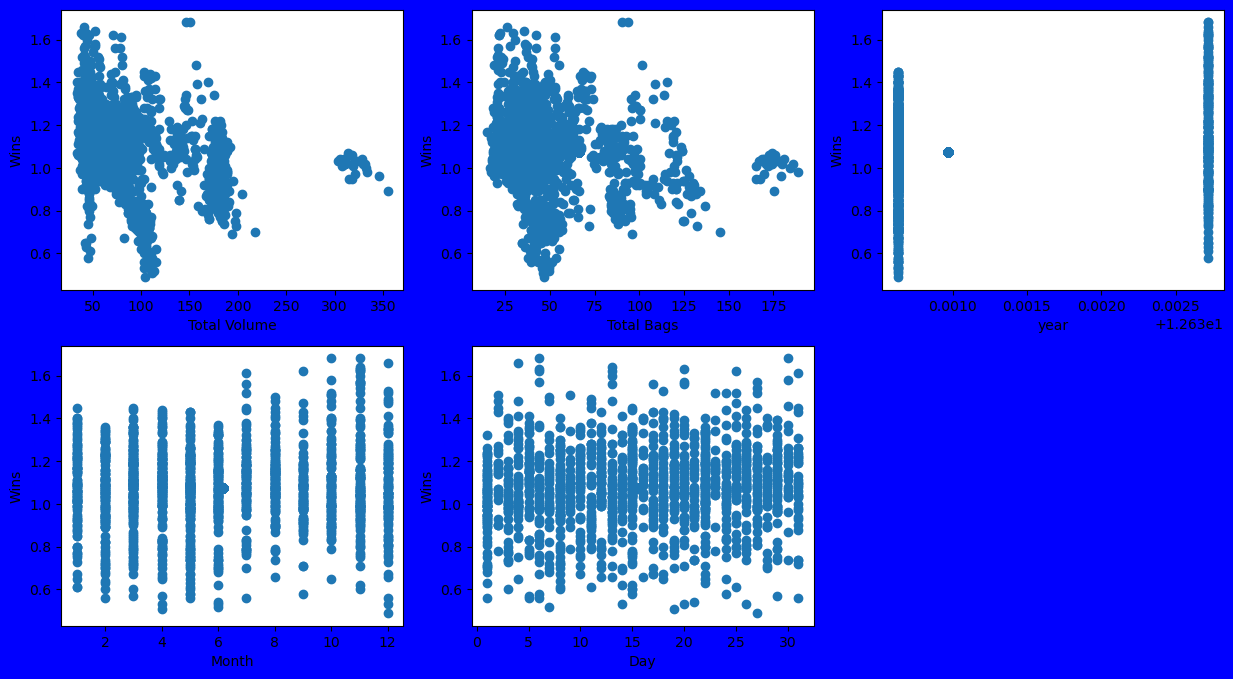

In [48]:
plt.figure(figsize=(15,8), facecolor='blue')
plotnumber = 1

for column in x:
    if plotnumber<=7:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Wins', fontsize=10)
        
    plotnumber+=1
plt.show()

In [49]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [51]:
#splitting the data into training and testing so that we could make predictions further

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 300)


In [52]:
regression = LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [53]:
regression.score(x_train,y_train) #here is the score of train data

0.19010617310200617

In [54]:
regression.score(x_test,y_test) #here is the score of test data

0.20609973541215765

In [57]:
pred_LR = regression.predict(x_test)
pred_train=regression.predict(x_train)
print("r2_score:" , r2_score(y_test,pred_LR))
print("r2_score on training data:" ,r2_score(y_train,pred_train)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test, pred_LR))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred_LR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred_LR)))


r2_score: 0.20609973541215765
r2_score on training data: 19.010617310200615
Mean absolute error: 0.012953252751021754
Mean squared erroe: 0.002250954140470487
Root mean squared error: 0.047444221360145505


In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score


In [58]:
import joblib
joblib.dump(regression, 'Avocado.pkl')


['Avocado.pkl']

In [59]:
RFC = joblib.load('Avocado.pkl')

prediction = regression.predict(x_test)  
prediction


array([1.07256643, 1.07256643, 1.07256643, ..., 1.07256643, 1.07256643,
       1.07256643])

In [60]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data


,Predicted,Actual
0,1.072566,1.07499
1,1.072566,1.07499
2,1.072566,1.07499
3,1.072566,1.07499
4,1.072566,1.07499
...,...,...
4936,1.120810,1.24000
4937,1.072566,1.07499
4938,1.072566,1.07499
4939,1.072566,1.07499


This is the prediction or the task done on the basis of regression
